In [1]:
import tensorflow as tf
import keras

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

np.random.seed(42)

### Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [3]:
y_pred

array([1])

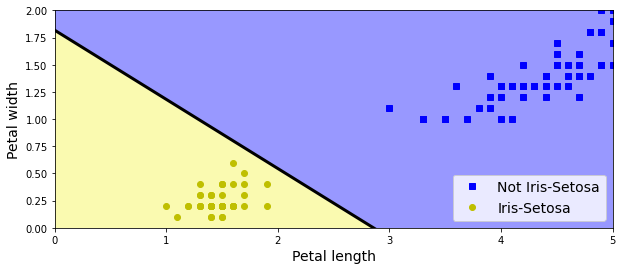

In [4]:
from matplotlib.colors import ListedColormap
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

### Activation Functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

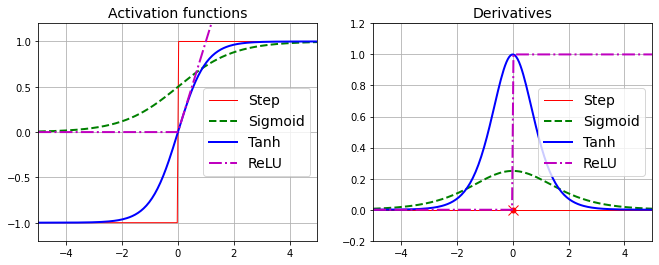

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

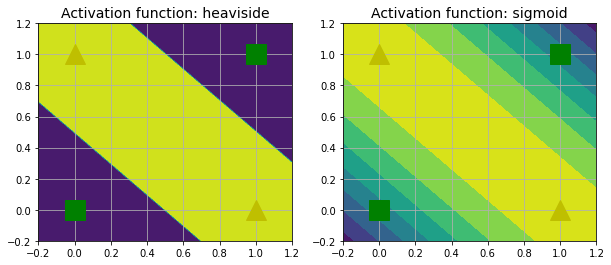

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### Buidling an Image Classifier

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

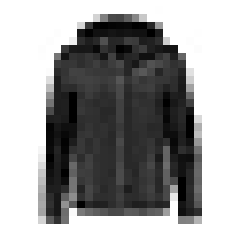

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

In [15]:
print("Shape of X_valid: ", X_valid.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_valid:  (5000, 28, 28)
Shape of X_test:  (10000, 28, 28)


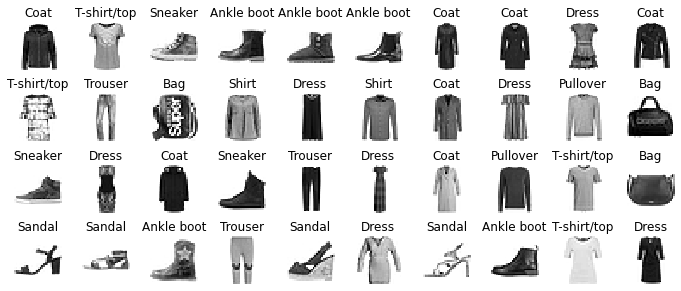

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


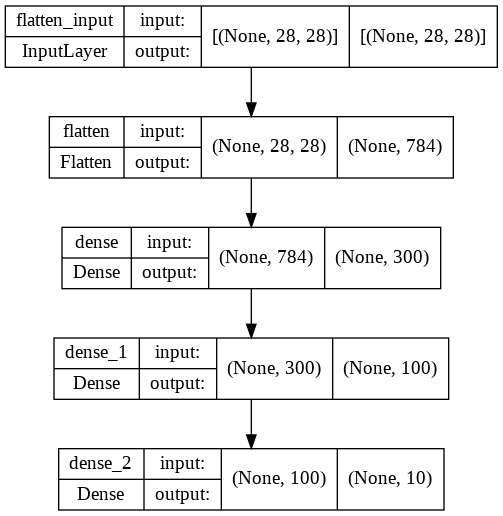

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
print("shape of weight vector: ", weights.shape)
print("shape of bias vector: ", biases.shape)

shape of weight vector:  (784, 300)
shape of bias vector:  (300,)


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 5ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8320 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4389 - accuracy: 0.8456 - val_loss: 0.5333 - val_accuracy: 0.7990
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4121 - accuracy: 0.8563 - val_loss: 0.3920 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3936 - accuracy: 0.8620 - val_loss: 0.3751 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3750 - accuracy: 0.8680 - val_loss: 0.3723 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3631 - accuracy: 0.8715 - val_loss: 0.3623 - val_accuracy

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

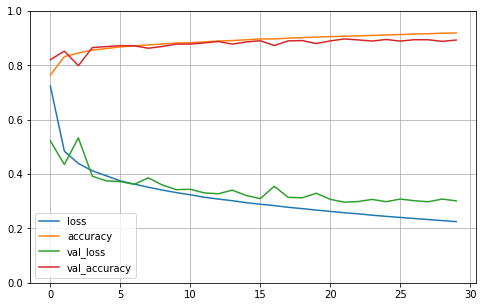

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8811


[0.33462974429130554, 0.8810999989509583]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

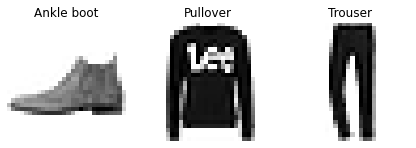

In [37]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Regression MLP

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8376 - val_loss: 1.0720
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6953 - val_loss: 0.6397
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6373 - val_loss: 0.5960
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6050 - val_loss: 0.5744
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5785 - val_loss: 0.5613
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5558 - val_loss: 0.5296
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5369 - val_loss: 0.5063
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5214 - val_loss: 0.5133
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5074 - val_loss: 0.4940
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4956 - val_loss: 0.4764

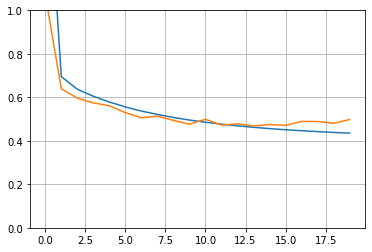

In [40]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
y_pred

array([[0.7789993],
       [1.6928984],
       [3.364184 ]], dtype=float32)

### Functional API

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [44]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8871 - val_loss: 0.9046
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6985 - val_loss: 1.2191
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6362 - val_loss: 0.6300
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5406
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5507 - val_loss: 0.5568
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5220 - val_loss: 0.5102
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5009 - val_loss: 0.4646
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4829 - val_loss: 0.4541
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4675 - val_loss: 0.4537
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4558 - val_loss: 0.4169

In [45]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [46]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8512 - val_loss: 1.6649
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8039 - val_loss: 0.7822
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6764 - val_loss: 0.6340
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6192 - val_loss: 0.5860
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5809 - val_loss: 0.5472
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5511 - val_loss: 0.5176
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5268 - val_loss: 0.4939
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5068 - val_loss: 0.4726
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4896 - val_loss: 0.4566
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4760 - val_loss: 0.4445

In [47]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [48]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                            

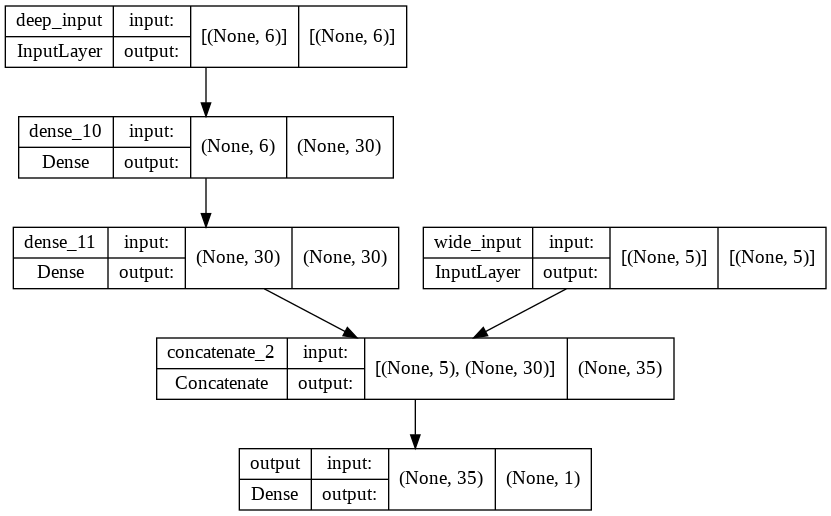

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [50]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.2789 - val_loss: 2.3491
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8530 - val_loss: 0.9370
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7243 - val_loss: 0.6847
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6617 - val_loss: 0.6149
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6199 - val_loss: 0.5806
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5858 - val_loss: 0.5720
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5581 - val_loss: 0.5726
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5334 - val_loss: 0.5507
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5124 - val_loss: 0.5443
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4960 - val_loss: 0.5452

In [51]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [52]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))

In [53]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.7225 - main_output_loss: 2.4357 - aux_output_loss: 5.3031 - val_loss: 2.0464 - val_main_output_loss: 1.6520 - val_aux_output_loss: 5.5962
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0533 - main_output_loss: 0.7839 - aux_output_loss: 3.4785 - val_loss: 0.9771 - val_main_output_loss: 0.7597 - val_aux_output_loss: 2.9339
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8169 - main_output_loss: 0.6496 - aux_output_loss: 2.3218 - val_loss: 0.7354 - val_main_output_loss: 0.6015 - val_aux_output_loss: 1.9409
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7282 - main_output_loss: 0.6097 - aux_output_loss: 1.7943 - val_loss: 0.6695 - val_main_output_loss: 0.5704 - val_aux_output_loss: 1.5613
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6819 - main_output_loss: 0.5862 - aux_output_loss: 1.5435 - val_loss

In [54]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 2ms/step - loss: 0.4897 - main_output_loss: 0.4408 - aux_output_loss: 0.9295


### The subclassing API

In [55]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [56]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.3722 - output_1_loss: 2.2027 - output_2_loss: 3.8972 - val_loss: 1.6532 - val_output_1_loss: 1.2104 - val_output_2_loss: 5.6382
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.9425 - output_1_loss: 0.7994 - output_2_loss: 2.2304 - val_loss: 1.5668 - val_output_1_loss: 1.0215 - val_output_2_loss: 6.4750
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7666 - output_1_loss: 0.6670 - output_2_loss: 1.6636 - val_loss: 1.4250 - val_output_1_loss: 0.8813 - val_output_2_loss: 6.3177
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6898 - output_1_loss: 0.6095 - output_2_loss: 1.4127 - val_loss: 1.1640 - val_output_1_loss: 0.6616 - val_output_2_loss: 5.6857
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6400 - output_1_loss: 0.5695 - output_2_loss: 1.2742 - val_loss: 1.0051 - val_output_1_loss: 0.5795 - val_ou

### Saving and Restoring

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [58]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 2.1781 - val_loss: 1.7808
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8040 - val_loss: 0.8024
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7037 - val_loss: 0.8151
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - val_loss: 0.6666
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6218 - val_loss: 0.6082
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5610
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5632 - val_loss: 0.5389
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5401 - val_loss: 0.5031
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5199 - val_loss: 0.4796
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4806


In [59]:
model.save("keras_example_model.h5")
model = keras.models.load_model("keras_example_model.h5")

In [60]:
model.save_weights('keras_example_weights.ckpt')
model.load_weights('keras_example_weights.ckpt')

### Using callbacks during training

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [62]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.6411 - val_loss: 0.8058
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7431 - val_loss: 0.7239
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6647 - val_loss: 0.6913
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6170 - val_loss: 0.6103
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5594
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5484 - val_loss: 0.5367
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5231 - val_loss: 0.5170
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5023 - val_loss: 0.4777
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4844 - val_loss: 0.4602
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4559


In [63]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4581 - val_loss: 0.4329
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4479 - val_loss: 0.4252
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4396 - val_loss: 0.4161
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4322 - val_loss: 0.4215
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4264 - val_loss: 0.4240
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4210 - val_loss: 0.4330
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4167 - val_loss: 0.4256
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4128 - val_loss: 0.4156
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4093 - val_loss: 0.4229
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4061 - val_lo

### HP Tuing

In [64]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [65]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [66]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.2675 - val_loss: 15.1545
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7275 - val_loss: 2.9025
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5221 - val_loss: 0.4433
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4609 - val_loss: 0.4389
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4429 - val_loss: 0.4018
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4249 - val_loss: 0.4334
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4182 - val_loss: 0.3879
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4107 - val_loss: 0.3787
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4050 - val_loss: 0.3871
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4015 - val_l

In [67]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3435


In [68]:
y_pred = keras_reg.predict(X_new)

In [69]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 1.9462 - val_loss: 1.2696
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.2710 - val_loss: 1.1558
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9539 - val_loss: 0.9726
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8438 - val_loss: 0.7497
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7151 - val_loss: 0.6688
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5964 - val_loss: 0.5199
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5167 - val_loss: 0.5530
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4999 - val_loss: 0.4672
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4812 - val_loss: 0.4718
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f36399e5110>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00502142573

In [70]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [71]:
rnd_search_cv.best_score_

-0.3174632092316945

In [72]:
rnd_search_cv.best_estimator_

In [73]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2925


-0.2924957573413849

In [74]:
model = rnd_search_cv.best_estimator_.model
model

In [75]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2925


0.2924957573413849

# 3

#### 1

1. Shape of input matrix X is __NX10__ where N represents the training batch size.  
2. Shape of hidden layer's weight vector __Wk__ is __10X50__ and shape of bias vector __bk__ is __(50,)__.  
3. Shape of output layer's weight vector __Wa__ is __50X3__ and shape of bias vector __ba__ is __(3,)__.  
4. Therefore, shape of the NN's output matrix Y is __NX3__.
5. To sum up the process above,  
Y = RELU(RELU(XWk+bk)Wa+ba)

#### 2

Backpropagation is used for training NN model. It computes the gradient of cost function with regard to every model parameters(ie. all weights and biases), then it performs a Gradient Desscent using these gradients.  
W+ = W - dE/DW, b+ = b-dE/db (E is cost function)  
Reverse-mode autodiff performs a forward pass through a computation graph, computing every node’s value for the current training batch, and then it performs a reverse pass, computing all the gradients at once. Using Reverse-mode autodiff we can calculate the gradients efficiently. To sum up, Backpropagation is process of updating the parameters used in NN model and reverse-mode autodiff is one of ways to calculate gradients to be used for backpropagation. 

#### 3

we can change the numbers of hidden layers and numbers of neurons in each hidden layer, activation function applied to each hidden layer, etc. to improce the performance of NN model. To solve overfitting issue, we can reduce the number of hidden layers and numbers of neurons in each hidden layer also . Also, we can add Dropout layers or apply regularization technique to reduce overfitting. 

#### 4

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [78]:
X_train, X_test = X_train/255, X_test/255

In [79]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [81]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of y_val: ", y_val.shape)

Shape of X_train:  (48000, 28, 28)
Shape of y_train:  (48000, 10)
Shape of X_val:  (12000, 28, 28)
Shape of y_val:  (12000, 10)


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Flatten(input_shape=[28,28], name='input'))
model.add(Dense(400, activation='relu', name='hidden1'))
model.add(Dropout(0.2, name='dropout1'))
model.add(BatchNormalization())
model.add(Dense(75, activation='relu', name='hidden2'))
model.add(Dropout(0.2, name='dropout2'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax', name='output'))

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 400)               314000    
                                                                 
 dropout1 (Dropout)          (None, 400)               0         
                                                                 
 batch_normalization (BatchN  (None, 400)              1600      
 ormalization)                                                   
                                                                 
 hidden2 (Dense)             (None, 75)                30075     
                                                                 
 dropout2 (Dropout)          (None, 75)                0         
                                                        

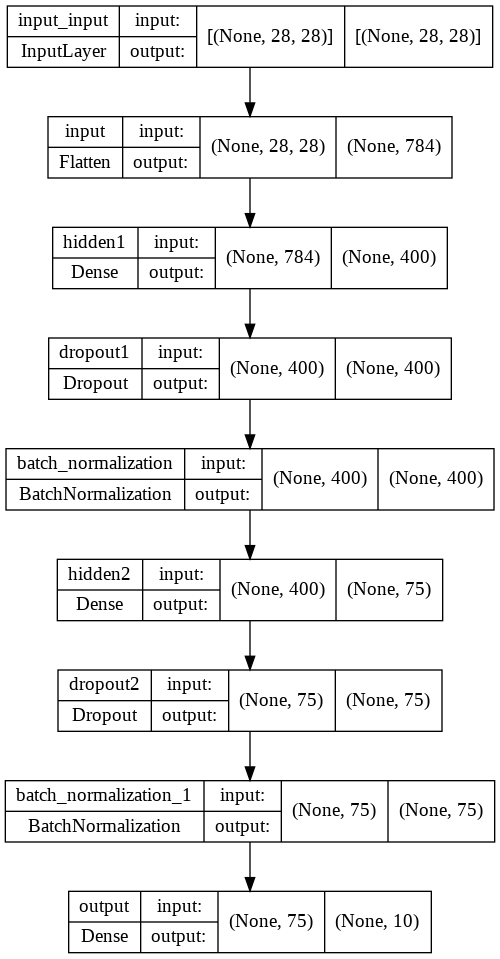

In [84]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [85]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# es = EarlyStopping(monitor = 'val_loss', patience = 5)

In [86]:
history = model.fit(X_train, y_train, batch_size=400, 
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
120/120 [==============================] - 2s 6ms/step - loss: 0.4172 - accuracy: 0.8800 - val_loss: 0.5062 - val_accuracy: 0.9391
Epoch 2/50
120/120 [==============================] - 1s 5ms/step - loss: 0.1649 - accuracy: 0.9533 - val_loss: 0.2053 - val_accuracy: 0.9616
Epoch 3/50
120/120 [==============================] - 1s 5ms/step - loss: 0.1125 - accuracy: 0.9681 - val_loss: 0.1133 - val_accuracy: 0.9690
Epoch 4/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0873 - accuracy: 0.9745 - val_loss: 0.0933 - val_accuracy: 0.9728
Epoch 5/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0720 - accuracy: 0.9787 - val_loss: 0.0844 - val_accuracy: 0.9743
Epoch 6/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.0779 - val_accuracy: 0.9764
Epoch 7/50
120/120 [==============================] - 1s 5ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0794 - val_accuracy: 0.9768
Epoch 

In [87]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9823


[0.08627226948738098, 0.9822999835014343]

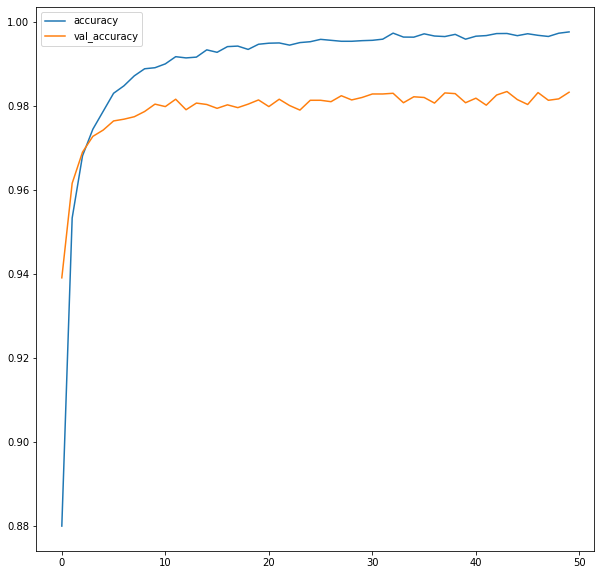

In [88]:
pd.DataFrame({'accuracy':history.history['accuracy'], 'val_accuracy':history.history['val_accuracy']}).plot(figsize=(10,10))

In [89]:
def plot_accuracy(history):
  pd.DataFrame({'accuracy':history.history['accuracy'], 'val_accuracy':history.history['val_accuracy']}).plot(figsize=(10,10))
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title("Accuracy", fontsize=20)
  plt.show()

In [90]:
def plot_loss(history):
  pd.DataFrame({'accuracy':history.history['loss'], 'val_accuracy':history.history['val_loss']}).plot(figsize=(10,10))
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title("Loss", fontsize=20)
  plt.show()

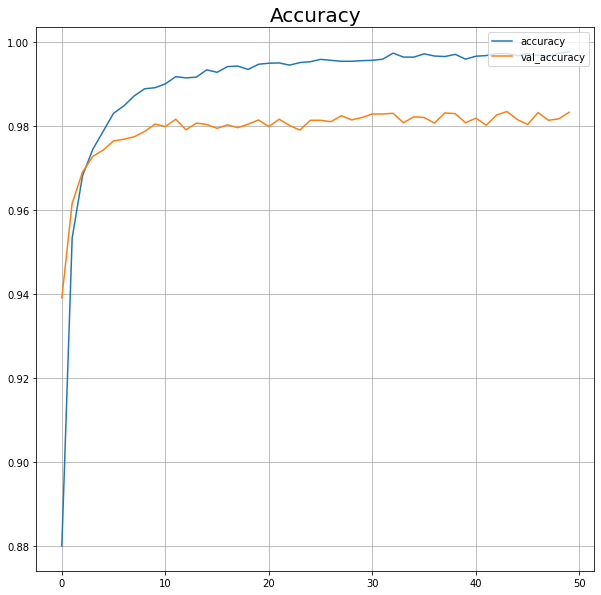

In [91]:
plot_accuracy(history)

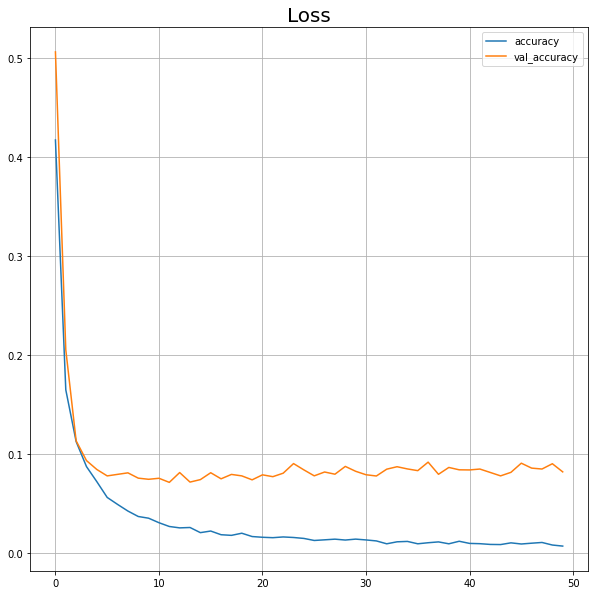

In [92]:
plot_loss(history)